<a href="https://colab.research.google.com/github/okech-glitch/python/blob/main/Insurance_Claims_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving claims_data.csv to claims_data.csv


**Loading Data**

In [2]:
import pandas as pd

# Replace 'filename.csv' with the name of your uploaded file
df = pd.read_csv('claims_data.csv')


**Data Exploration**

In [3]:
print(df.head())


   age     sex     bmi  steps  children smoker     region insurance_claim  \
0   19  female  27.900   3009         0    yes  southwest             yes   
1   18    male  33.770   3008         1     no  southeast             yes   
2   28    male  33.000   3009         3     no  southeast              no   
3   33    male  22.705  10009         0     no  northwest              no   
4   32    male  28.880   8010         0     no  northwest             yes   

   claim_amount  
0    16884.9240  
1     1725.5523  
2        0.0000  
3        0.0000  
4     3866.8552  


In [4]:
print(df.isnull().sum())


age                0
sex                0
bmi                0
steps              0
children           0
smoker             0
region             0
insurance_claim    0
claim_amount       0
dtype: int64


Check the distribution of the target variable

In [5]:
print(df['insurance_claim'].value_counts())


insurance_claim
yes    783
no     555
Name: count, dtype: int64


Obtain detailed statistics for each feature, including mean, median, standard deviation, min, and max:

In [6]:
print(df.describe(include='all'))


                age   sex          bmi         steps     children smoker  \
count   1338.000000  1338  1338.000000   1338.000000  1338.000000   1338   
unique          NaN     2          NaN           NaN          NaN      2   
top             NaN  male          NaN           NaN          NaN     no   
freq            NaN   676          NaN           NaN          NaN   1064   
mean      39.207025   NaN    30.663397   5328.623318     1.094918    NaN   
std       14.049960   NaN     6.098187   2453.643236     1.205493    NaN   
min       18.000000   NaN    15.960000   3000.000000     0.000000    NaN   
25%       27.000000   NaN    26.296250   3008.000000     0.000000    NaN   
50%       39.000000   NaN    30.400000   4007.000000     1.000000    NaN   
75%       51.000000   NaN    34.693750   8004.000000     2.000000    NaN   
max       64.000000   NaN    53.130000  10010.000000     5.000000    NaN   

           region insurance_claim  claim_amount  
count        1338            1338   1

Get counts of unique values for categorical features

In [7]:
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())


sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
insurance_claim
yes    783
no     555
Name: count, dtype: int64


Plot histograms for numerical features to understand their distribution

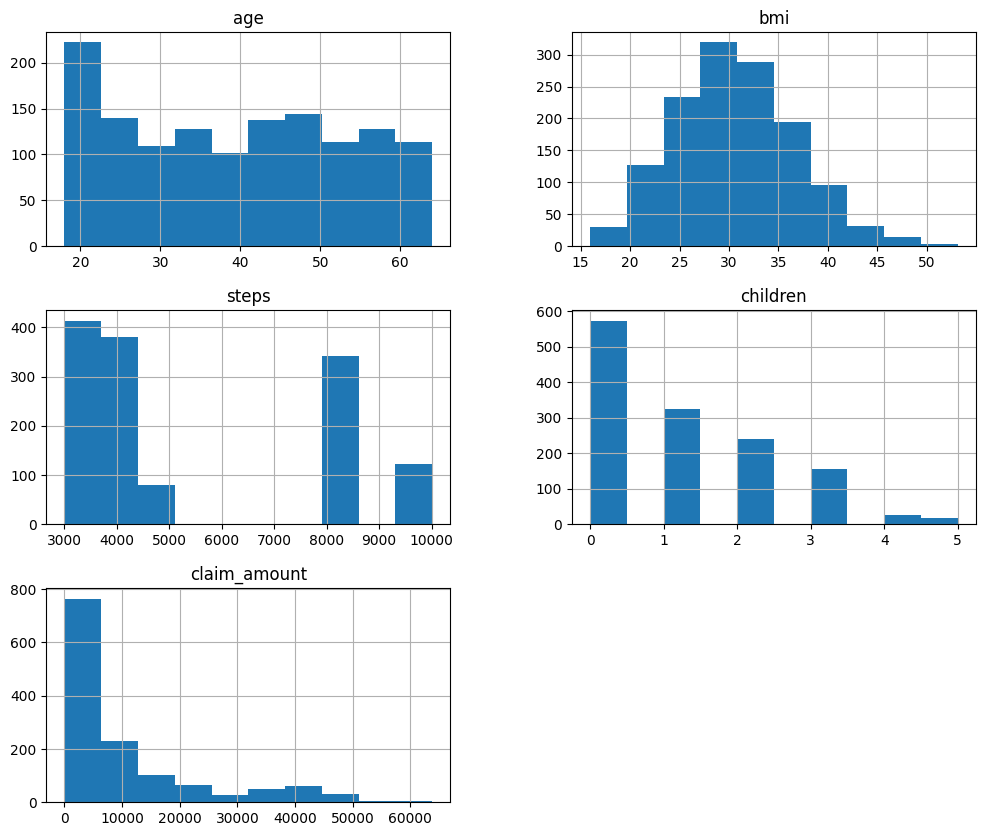

In [9]:
import matplotlib.pyplot as plt # Import the matplotlib library and give it the alias 'plt'

df[['age', 'bmi', 'steps', 'children', 'claim_amount']].hist(figsize=(12, 10))
plt.show()

Use KDE plots for a smooth estimate of distributions



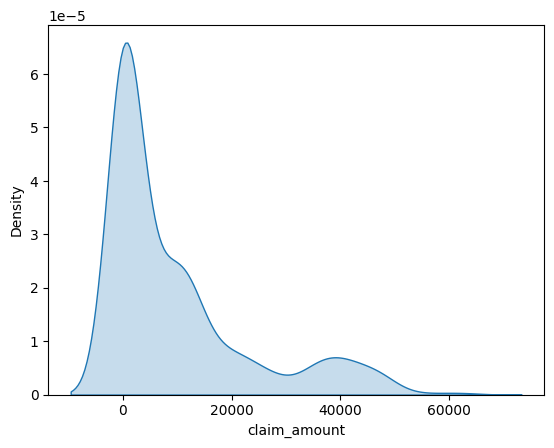

In [10]:
import seaborn as sns
sns.kdeplot(df['claim_amount'], fill=True)
plt.show()


Compute and visualize the correlation matrix to identify relationships between features

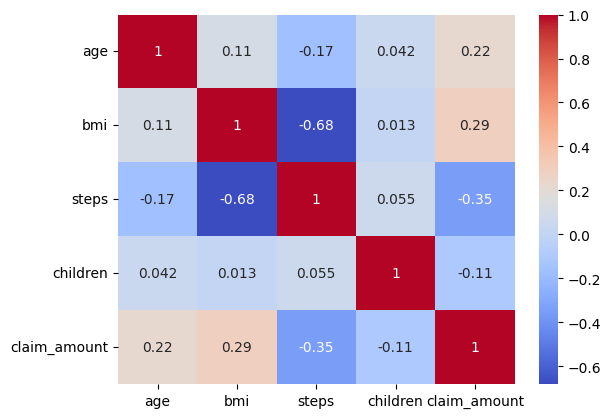

In [13]:
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Analyze how smoking status relates to insurance claims

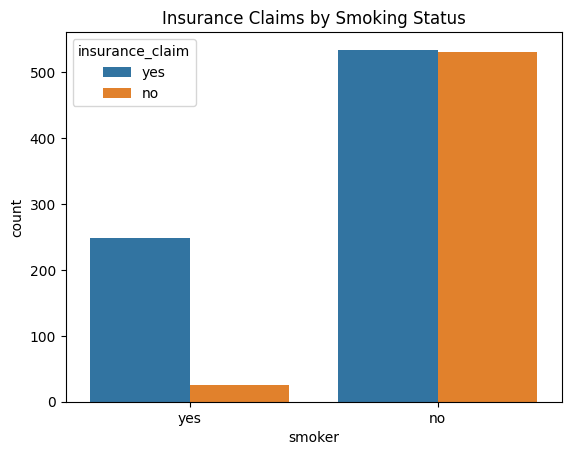

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='smoker', hue='insurance_claim', data=df)
plt.title('Insurance Claims by Smoking Status')
plt.show()


Investigate how region impacts claim amounts or the likelihood of insurance claims.


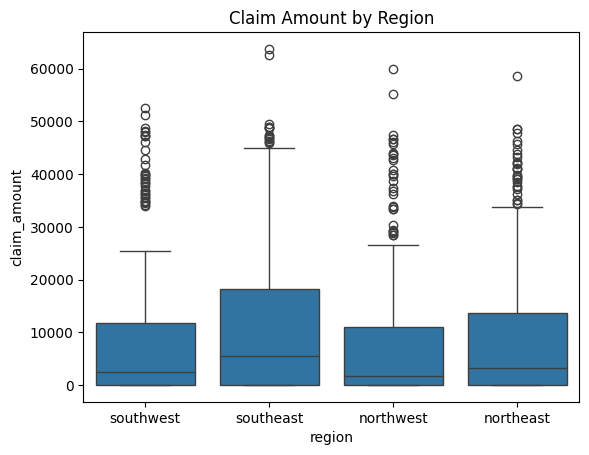

In [17]:
sns.boxplot(x='region', y='claim_amount', data=df)
plt.title('Claim Amount by Region')
plt.show()


Investigate the relationship between the number of steps and claim amount.

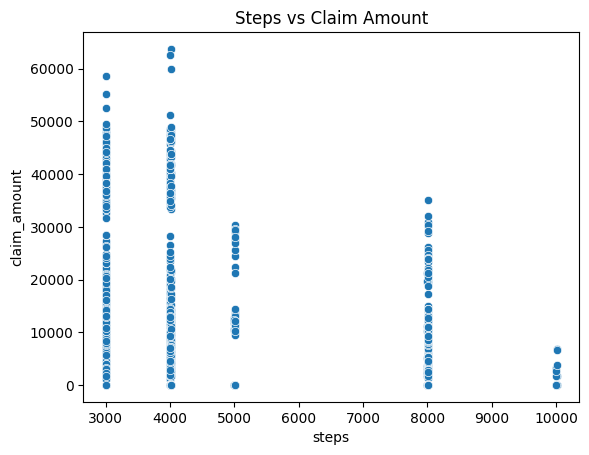

In [19]:
sns.scatterplot(x='steps', y='claim_amount', data=df)
plt.title('Steps vs Claim Amount')
plt.show()


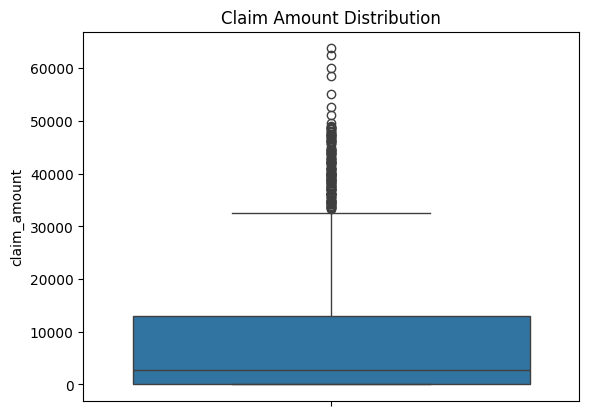

In [20]:
sns.boxplot(df['claim_amount'])
plt.title('Claim Amount Distribution')
plt.show()


**Data Preparation**

 Feature Importance Analysis
1. Statistical Methods

Correlation with Target Variable: Calculate correlation coefficients for numerical features with the target variable. For categorical variables, use methods like Chi-Square tests.

In [23]:
# For numerical features
correlation = df.corr(numeric_only=True).sort_values(by='claim_amount', ascending=False) # Sort by 'claim_amount' if it exists
print(correlation)

                   age       bmi     steps  children  claim_amount
claim_amount  0.218863  0.293001 -0.346876 -0.108556      1.000000
bmi           0.109272  1.000000 -0.681149  0.012759      0.293001
age           1.000000  0.109272 -0.167957  0.042469      0.218863
children      0.042469  0.012759  0.055346  1.000000     -0.108556
steps        -0.167957 -0.681149  1.000000  0.055346     -0.346876


In [25]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
X = df.drop('insurance_claim', axis=1)
y = df['insurance_claim']

# Encode categorical features (e.g., 'sex')
for col in X.select_dtypes(include=['object']):
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Now apply ANOVA F-statistic
f_values, p_values = f_classif(X, y)
print(f_values, p_values)


[1.75046334e+01 1.33247304e+00 2.31353921e+02 2.85342838e+02
 2.69213452e+02 1.66918440e+02 5.83356283e-01 7.58667561e+02] [3.05313660e-005 2.48572176e-001 2.62817401e-048 3.60588680e-058
 2.93688812e-055 4.56529702e-036 4.45134623e-001 1.23805573e-132]


Train models using each feature independently to determine their individual importance

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare datasets
X_bmi = df[['bmi']]
X_steps = df[['steps']]

# Split data
X_train_bmi, X_test_bmi, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)
X_train_steps, X_test_steps, _, _ = train_test_split(X_steps, y, test_size=0.2, random_state=42)

# Train and predict
model_bmi = LogisticRegression()
model_bmi.fit(X_train_bmi, y_train)
y_pred_bmi = model_bmi.predict(X_test_bmi)

model_steps = LogisticRegression()
model_steps.fit(X_train_steps, y_train)
y_pred_steps = model_steps.predict(X_test_steps)

# Evaluate
print('Accuracy with BMI:', accuracy_score(y_test, y_pred_bmi))
print('Accuracy with Steps:', accuracy_score(y_test, y_pred_steps))


Accuracy with BMI: 0.667910447761194
Accuracy with Steps: 0.6977611940298507


In [28]:
# Update dataset to exclude 'BMI'
df_final = df.drop(columns=['bmi'])


Split the updated dataset into features and target variable, and then into training and testing sets.

In [29]:
from sklearn.model_selection import train_test_split

# Prepare features and target variable
X_final = df_final.drop(columns=['claim_amount'])
y_final = df_final['claim_amount']

# Split data
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.2, random_state=42)


Feature Engineering


In [50]:
print(df.columns)  # Check if 'bmi' and 'age' are present
print(df[['bmi', 'age']].isnull().sum())  # Check for missing values


Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region',
       'insurance_claim', 'claim_amount', 'BMI_Age_Interaction',
       'Steps_Age_Interaction', 'age', 'bmi', 'steps', 'age^2', 'age bmi',
       'age steps', 'bmi^2', 'bmi steps', 'steps^2', 'region_encoded'],
      dtype='object')
bmi    0
bmi    0
age    0
age    0
dtype: int64


In [46]:
print(df[['age', 'bmi', 'steps', 'BMI_Age_Interaction', 'Steps_Age_Interaction']].head())


        age       age       bmi       bmi     steps     steps  \
0  0.021739  0.021739  0.321227  0.321227  0.001284  0.001284   
1  0.000000  0.000000  0.479150  0.479150  0.001141  0.001141   
2  0.217391  0.217391  0.458434  0.458434  0.001284  0.001284   
3  0.326087  0.326087  0.181464  0.181464  0.999857  0.999857   
4  0.304348  0.304348  0.347592  0.347592  0.714693  0.714693   

   BMI_Age_Interaction  Steps_Age_Interaction  
0              530.100                  57171  
1              607.860                  54144  
2              924.000                  84252  
3              749.265                 330297  
4              924.160                 256320  


In [43]:
# Prepare features and target variable
X = df[['age', 'bmi', 'steps', 'BMI_Age_Interaction', 'Steps_Age_Interaction']]
y = df['claim_amount']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error with Interaction Terms:', mse)


Mean Squared Error with Interaction Terms: 0.038095303357305994


In [45]:
importances = model.coef_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                 Feature    Importance
6    BMI_Age_Interaction  2.351450e-04
7  Steps_Age_Interaction  5.178354e-07
3                    bmi -1.106891e-01
2                    bmi -1.106891e-01
5                  steps -1.456082e-01
4                  steps -1.456082e-01
0                    age -1.766710e-01
1                    age -1.766710e-01


In [51]:
df = df.dropna(subset=['bmi', 'age'])  # Drop rows where 'bmi' or 'age' is missing


In [53]:
# Check for missing values
print(df[['bmi', 'age']].isnull().sum())

# Check the length of the columns
print(len(df['bmi']), len(df['age']))

# Check for any potential issues with the DataFrame
print(df[['bmi', 'age']].info())


bmi    0
bmi    0
age    0
age    0
dtype: int64
1338 1338
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bmi     1338 non-null   float64
 1   bmi     1338 non-null   float64
 2   age     1338 non-null   float64
 3   age     1338 non-null   float64
dtypes: float64(4)
memory usage: 41.9 KB
None


In [54]:
# Drop rows with missing values in 'bmi' or 'age'
df = df.dropna(subset=['bmi', 'age'])


In [58]:
import pandas as pd

# Load your dataset
df = pd.read_csv('claims_data.csv')

# Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Convert columns to numeric types
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Drop rows with missing values in 'bmi' or 'age'
df = df.dropna(subset=['bmi', 'age'])

# Create interaction terms
df['BMI_Age_Interaction'] = df['bmi'] * df['age']
df['Steps_Age_Interaction'] = df['steps'] * df['age']

# Verify DataFrame
print(df.head())
print(df.info())


   age     sex     bmi  steps  children smoker     region insurance_claim  \
0   19  female  27.900   3009         0    yes  southwest             yes   
1   18    male  33.770   3008         1     no  southeast             yes   
2   28    male  33.000   3009         3     no  southeast              no   
3   33    male  22.705  10009         0     no  northwest              no   
4   32    male  28.880   8010         0     no  northwest             yes   

   claim_amount  BMI_Age_Interaction  Steps_Age_Interaction  
0    16884.9240              530.100                  57171  
1     1725.5523              607.860                  54144  
2        0.0000              924.000                  84252  
3        0.0000              749.265                 330297  
4     3866.8552              924.160                 256320  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  -

In [59]:
# Recreate interaction terms
if 'bmi' in df.columns and 'age' in df.columns:
    df['BMI_Age_Interaction'] = df['bmi'] * df['age']
else:
    print("Warning: 'bmi' or 'age' column not found. Skipping BMI_Age_Interaction calculation.")


In [60]:
# Check if the columns 'bmi' and 'age' exist in the DataFrame
required_columns = ['bmi', 'age']
missing_columns = [col for col in required_columns if col not in df.columns]

if not missing_columns:
    # If no columns are missing, create interaction terms
    df['BMI_Age_Interaction'] = df['bmi'] * df['age']
    print("BMI_Age_Interaction created successfully.")
else:
    # Print a warning if columns are missing
    print(f"Warning: Missing columns: {', '.join(missing_columns)}. Skipping BMI_Age_Interaction calculation.")


BMI_Age_Interaction created successfully.


In [61]:
print(df.columns)  # Check the column names


Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region',
       'insurance_claim', 'claim_amount', 'BMI_Age_Interaction',
       'Steps_Age_Interaction'],
      dtype='object')


In [62]:
print(df.dtypes)  # Check data types


age                        int64
sex                       object
bmi                      float64
steps                      int64
children                   int64
smoker                    object
region                    object
insurance_claim           object
claim_amount             float64
BMI_Age_Interaction      float64
Steps_Age_Interaction      int64
dtype: object


** Data Preprocessing**

In [63]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)


In [64]:
from sklearn.preprocessing import StandardScaler

# Features to scale
features_to_scale = ['age', 'bmi', 'steps', 'children', 'BMI_Age_Interaction', 'Steps_Age_Interaction']

scaler = StandardScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])


In [65]:
# Features and target
X = df_encoded.drop(columns=['insurance_claim', 'claim_amount'])
y = df_encoded['insurance_claim'].apply(lambda x: 1 if x == 'yes' else 0)


In [66]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train Models**

Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.8544776119402985
Confusion Matrix:
 [[ 89  18]
 [ 21 140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       107
           1       0.89      0.87      0.88       161

    accuracy                           0.85       268
   macro avg       0.85      0.85      0.85       268
weighted avg       0.86      0.85      0.85       268



Decision Trees

In [68]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.9776119402985075
Confusion Matrix:
 [[103   4]
 [  2 159]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       107
           1       0.98      0.99      0.98       161

    accuracy                           0.98       268
   macro avg       0.98      0.98      0.98       268
weighted avg       0.98      0.98      0.98       268



Compare the 2 models

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


Logistic Regression Metrics:
Accuracy: 0.8544776119402985
Precision: 0.8860759493670886
Recall: 0.8695652173913043
F1 Score: 0.8777429467084639
ROC-AUC: 0.9062518140128867


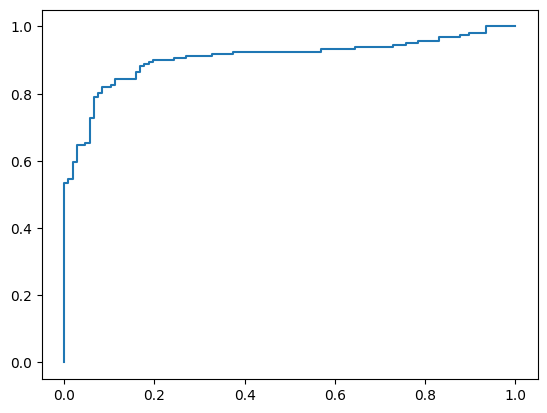

In [70]:
# Make predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Compute metrics
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_pred_prob_logistic)

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)
print("ROC-AUC:", roc_auc_logistic)

# ROC Curve
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_prob_logistic)
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_logistic)


Decision Tree Metrics:
Accuracy: 0.9776119402985075
Precision: 0.9754601226993865
Recall: 0.9875776397515528
F1 Score: 0.9814814814814815
ROC-AUC: 0.9750972310907297


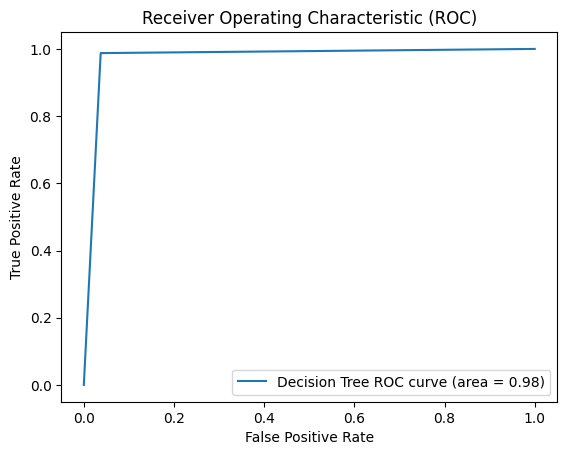

In [71]:
# Make predictions
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_prob_tree = decision_tree_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Compute metrics
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_prob_tree)

print("Decision Tree Metrics:")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1 Score:", f1_tree)
print("ROC-AUC:", roc_auc_tree)

# ROC Curve
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_prob_tree)
plt.plot(fpr_tree, tpr_tree, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc_tree)

# Finalize plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Tune Hyperparameters

In [72]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the model
decision_tree = DecisionTreeClassifier()

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model
best_decision_tree = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.9728971962616824


In [73]:
importances = best_decision_tree.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                  Feature  Importance
3                children    0.354400
1                     bmi    0.328279
7              smoker_yes    0.177385
0                     age    0.092248
2                   steps    0.037892
4     BMI_Age_Interaction    0.005793
5   Steps_Age_Interaction    0.003096
8        region_northwest    0.000907
6                sex_male    0.000000
9        region_southeast    0.000000
10       region_southwest    0.000000


In [75]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred_test = best_decision_tree.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       107
           1       0.98      0.98      0.98       161

    accuracy                           0.97       268
   macro avg       0.97      0.97      0.97       268
weighted avg       0.97      0.97      0.97       268

Confusion Matrix:
[[103   4]
 [  4 157]]


Deployment

In [76]:
import joblib

# Save the model
joblib.dump(best_decision_tree, 'decision_tree_model.pkl')

# Load the model
loaded_model = joblib.load('decision_tree_model.pkl')


In [77]:
new_data = {
    'age': 30,
    'bmi': 28.5,
    'steps': 5000,
    'children': 1,
    'smoker': 'yes',
    'region': 'southwest'
}


In [79]:
import pandas as pd

# Create a DataFrame for the new individual
new_data_df = pd.DataFrame([new_data])

# Ensure the same preprocessing is applied
# Example: Encoding categorical variables
# new_data_df['sex'] = new_data_df['sex'].map({'male': 0, 'female': 1})  # Remove this line as 'sex' is not in new_data
new_data_df['smoker'] = new_data_df['smoker'].map({'no': 0, 'yes': 1})
new_data_df['region'] = new_data_df['region'].map({
    'southwest': 0,
    'southeast': 1,
    'northwest': 2,
    'northeast': 3
})

# Generate interaction terms
new_data_df['BMI_Age_Interaction'] = new_data_df['bmi'] * new_data_df['age']
new_data_df['Steps_Age_Interaction'] = new_data_df['steps'] * new_data_df['age']

In [81]:
import pandas as pd

# Create a DataFrame for the new individual
new_data_df = pd.DataFrame([new_data])

# Ensure the same preprocessing is applied
# Example: Encoding categorical variables
new_data_df['smoker'] = new_data_df['smoker'].map({'no': 0, 'yes': 1})
new_data_df['region'] = new_data_df['region'].map({
    'southwest': 0,
    'southeast': 1,
    'northwest': 2,
    'northeast': 3
})

# Generate interaction terms
new_data_df['BMI_Age_Interaction'] = new_data_df['bmi'] * new_data_df['age']
new_data_df['Steps_Age_Interaction'] = new_data_df['steps'] * new_data_df['age']

# Add missing columns and fill with 0 (assuming they are binary features)
for col in ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']:
    if col not in new_data_df.columns:
        new_data_df[col] = 0  # Fill with 0 assuming they are binary features

# Align the columns with the training data
new_data_df = new_data_df[X.columns]

In [82]:
# Load the trained model (if not already loaded)
import joblib
best_decision_tree = joblib.load('decision_tree_model.pkl')

# Make the prediction
prediction = best_decision_tree.predict(new_data_df)

# Convert the prediction to a human-readable format
prediction_label = 'yes' if prediction[0] == 1 else 'no'
print(f"The prediction for the new individual is: {prediction_label}")


The prediction for the new individual is: no


In [84]:
import pandas as pd
import joblib

# Define the new individual's data
new_person_data = {
    'age': 45,
    'bmi': 22.3,
    'steps': 6000,
    'children': 2,
    'smoker': 'no',
    'region': 'northeast'
}

# Create a DataFrame for the new individual
new_person_df = pd.DataFrame([new_person_data])

# Encode categorical variables
new_person_df['smoker'] = new_person_df['smoker'].map({'no': 0, 'yes': 1})
new_person_df['region'] = new_person_df['region'].map({
    'southwest': 0,
    'southeast': 1,
    'northwest': 2,
    'northeast': 3
})

# Generate interaction terms
new_person_df['BMI_Age_Interaction'] = new_person_df['bmi'] * new_person_df['age']
new_person_df['Steps_Age_Interaction'] = new_person_df['steps'] * new_person_df['age']

# Add missing columns and fill with 0
# (This assumes one-hot encoding was used on the training data)
for col in ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']:
    if col not in new_person_df.columns:
        new_person_df[col] = 0

# Align columns with the training data
new_person_df = new_person_df[X.columns]

# Load the trained model
model = joblib.load('decision_tree_model.pkl')

# Make the prediction
prediction = model.predict(new_person_df)

# Output the prediction
prediction_label = 'yes' if prediction[0] == 1 else 'no'
print(f"The prediction for the new individual is: {prediction_label}")

The prediction for the new individual is: yes
